# Daily Inmates In Custody in NYC
I have found a dataset which has the daily inmates who are in custody in NYC. By looking at the data, I noticed that almost 40% of the inmates are under mental observation. This is a pretty high number, which means that the 'system' instead of taking care the people with mental health problems in specialized facilities, it puts them away in prizon. We'll focus on the inmates who are under mental observation and will try to find more information about them.  

I found the data at the https://opendata.cityofnewyork.us/ . After reading the documentation about their API I connected to their data. 

<b> Things that I want to do </b>

a) use more the "stack" feature of .plot()

b) find out what some codes are (used at the dataset).

c) examine the data overtime (use time in the visualizations)

d) need to do more work on the analysis of the data. Ideally to see whats the situation in other states. 

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofnewyork.us", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata('data.cityofnewyork.us',
#                  'XXX',
#                  username="XXX",
#                  password="XXX")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("gqrb-77i6", limit=10000)

# Convert to pandas DataFrame
df = pd.DataFrame.from_records(results)
len(df)

8173

In [6]:
# df=df[df.admitted_dt.str.contains('2018')]
# len(df)

In [7]:
# INMATEID This is the primary key column that uniquely identifies each inmate record.

# ADMITTED_DT This field has the admitted date and time of the incident.

# DISCHARGED_DT This field has the inmate discharged date and time.

# CUSTODY_LEVEL This has the level of cutody provided for the inmate. Values are MIN,MED,Max custody levels.

# BRADH has values Y or N. The inmate is under mental observation.

# RACE Race of the inmate.

# GENDER Gender of the inmate (Male or female).

# AGE Calculated Age of the inmate.

# INMATE_STATUS_CODE provides the inmate status example if an inmate id a detainee.

# SEALED Sealed=Y implies that the inmate information is not to be shown in public.

# SRG_FLG=Y means that the inmate is an approved gang affiliation.

# TOP_CHARGE Top charge for the inmate.

# INFRACTION Indicates whether the inmate has infraction.

In [8]:
df.keys()

Index(['admitted_dt', 'age', 'bradh', 'custody_level', 'gender', 'infraction',
       'inmate_status_code', 'inmateid', 'race', 'sealed', 'srg_flg',
       'top_charge'],
      dtype='object')

In [9]:
df['mental']=df.bradh.str.replace('Y','Under Mental Observation').replace('N','Without Mental Observation')

[Text(0,0.5,'y label')]

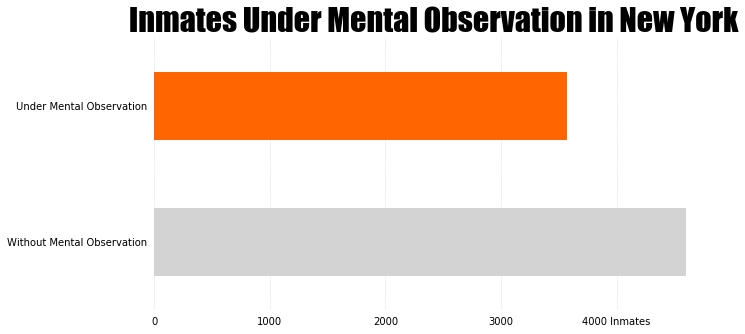

In [10]:
bar_colors=['lightgray','#FF6600']

ax=df.mental.value_counts().plot(kind='barh',figsize=(10,5),color=bar_colors)

ax.title.set_fontname('Impact')
ax.set_title('Inmates Under Mental Observation in New York')
ax.title.set_fontsize(32)
ax.title.set_fontweight(weight='black')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(which='major', left=False, bottom=False)
ax.grid(True, axis='x', color='lightgray', linestyle=':')


ax.set_axisbelow(True)
ax.yaxis.label.set_visible(False)
ax.set_xticklabels([0,1000,2000,3000,'4000 Inmates'])
ax.set(ylabel="y label")

In [11]:
df['Race']=df.race.str.replace('B','Black').replace('O','Other').replace('W','White').replace('A','Asian').replace('U','Unidentified')

In [12]:
mental=df[df.bradh=='Y']


[Text(0,0,'0'),
 Text(0,0,'10'),
 Text(0,0,'20'),
 Text(0,0,'30'),
 Text(0,0,'40'),
 Text(0,0,'50 Percent')]

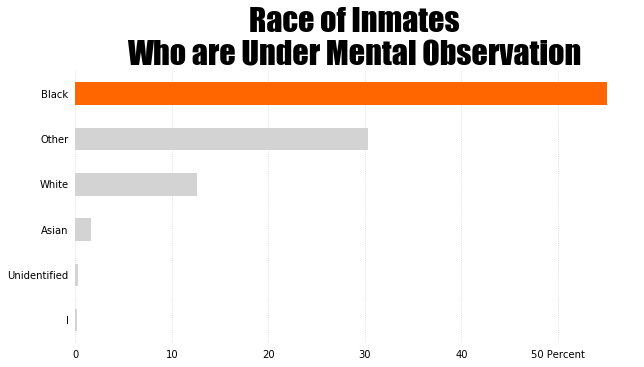

In [13]:
bar_colors=['lightgray','lightgray','lightgray','lightgray','lightgray','#FF6600']

ax=mental.Race.value_counts(normalize=True).sort_values().plot(kind='barh', x='Race', figsize=(10,5),color=bar_colors, stacked=True,)

ax.title.set_fontname('Impact')
ax.set_title('Race of Inmates\nWho are Under Mental Observation')
ax.title.set_fontsize(32)
ax.title.set_fontweight(weight='black')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(which='major', left=False, bottom=False)

ax.grid(True, axis='x', color='lightgray', linestyle=':')


ax.set_axisbelow(True)
ax.yaxis.label.set_visible(False)
ax.set_xticklabels([0,10,20,30,40,'50 Percent'])



[Text(0,0.5,'y label')]

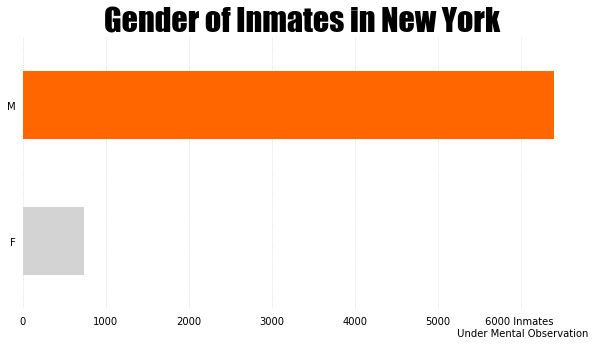

In [14]:
bar_colors=['lightgray','#FF6600']

ax=mental.gender.value_counts().sort_values().plot(kind='barh',figsize=(10,5),color=bar_colors)

ax.title.set_fontname('Impact')
ax.set_title('Gender of Inmates in New York')
ax.title.set_fontsize(32)
ax.title.set_fontweight(weight='black')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(which='major', left=False, bottom=False)
ax.grid(True, axis='x', color='lightgray', linestyle=':')


ax.set_axisbelow(True)
ax.yaxis.label.set_visible(False)
ax.set_xticklabels([0,1000,2000,3000,4000,5000,'6000 Inmates \n Under Mental Observation'])
ax.set(ylabel="y label")

In [15]:
df['gangs']=df.srg_flg.str.replace('N',"Not a Member of any Gang").replace('Y','Member of Gang')
mental=df[df.bradh=='Y']

[Text(0,0.5,'y label')]

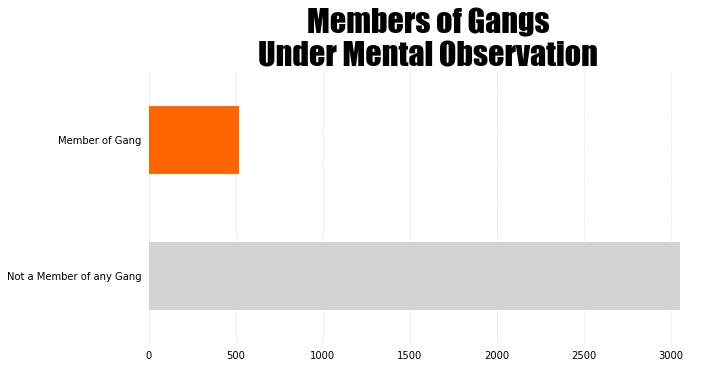

In [16]:
bar_colors=['lightgray','#FF6600']

ax=mental.gangs.value_counts().plot(kind='barh',figsize=(10,5),color=bar_colors)

ax.title.set_fontname('Impact')
ax.set_title('Members of Gangs\nUnder Mental Observation')
ax.title.set_fontsize(32)
ax.title.set_fontweight(weight='black')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(which='major', left=False, bottom=False)
ax.grid(True, axis='x', color='lightgray', linestyle=':')


ax.set_axisbelow(True)
ax.yaxis.label.set_visible(False)
#ax.set_xticklabels([0,1000,2000,3000,4000,5000,'6000 Inmates \n Under Mental Observation'])
ax.set(ylabel="y label")

In [17]:
#NEED TO FIND OUT WHAT THESE CODES ARE
mental[mental.gangs=='Member of Gang'].inmate_status_code.value_counts()

DE     376
DEP     71
CS      35
DPV     24
DNS      7
SSR      4
CSP      2
SCO      1
Name: inmate_status_code, dtype: int64

In [18]:
#NEED TO FIND OUT WHAT THESE CODES ARE
mental[mental.gangs=='Member of Gang'].top_charge.value_counts()

125.25         67
160.15         50
110-125.25     42
265.03         39
120.05         22
160.10         21
120.10         19
140.25         14
220.39         13
140.30         12
155.30         10
110-120.10      9
140.20          9
220.16          9
105.15          8
120.00          7
105.17          6
125.27          6
170.25          5
135.25          5
110-160.15      5
155.25          5
110-120.07      4
215.50          4
CO              4
215.51          3
230.34          3
150.15          3
220.03          3
110-140.25      3
               ..
265.02          1
165.50          1
110-120.05      1
265.01          1
110-140.30      1
195.05          1
170.20          1
215.52          1
AC 999.99       1
165.40          1
220.41          1
265.12          1
220.31          1
130.65          1
110-130.35H     1
125.20          1
120.11          1
220.34          1
110-220.39      1
AC 000.00       1
490.20          1
220.21          1
230.20          1
130.52          1
220.44    

In [19]:
df.keys()

Index(['admitted_dt', 'age', 'bradh', 'custody_level', 'gender', 'infraction',
       'inmate_status_code', 'inmateid', 'race', 'sealed', 'srg_flg',
       'top_charge', 'mental', 'Race', 'gangs'],
      dtype='object')

In [22]:
df['admitted']=pd.to_datetime(df.admitted_dt, format='%Y/%m/%d %H:%M:%S')

In [23]:
df.head()

,admitted_dt,age,bradh,custody_level,gender,infraction,inmate_status_code,inmateid,race,sealed,srg_flg,top_charge,mental,Race,gangs,admitted
0,2018-06-01T23:39:50.000,30,N,MED,M,N,DPV,20025,B,N,N,NaN,Without Mental Observation,Black,Not a Member of any Gang,2018-06-01 23:39:50
1,2018-06-22T16:56:05.000,33,N,MAX,M,N,DE,58432,B,N,N,160.10,Without Mental Observation,Black,Not a Member of any Gang,2018-06-22 16:56:05
2,2018-06-22T17:17:42.000,64,Y,MIN,M,N,DE,20196082,A,N,N,130.55,Under Mental Observation,Asian,Not a Member of any Gang,2018-06-22 17:17:42
3,2018-06-01T16:37:28.000,39,N,MIN,M,N,CS,10013090,B,N,N,110-220.39,Without Mental Observation,Black,Not a Member of any Gang,2018-06-01 16:37:28
4,2017-09-30T16:09:23.000,21,Y,MED,M,Y,DE,20187487,B,N,N,130.50,Under Mental Observation,Black,Not a Member of any Gang,2017-09-30 16:09:23
